# Lending Club Case Study

[Kantajit Shaw](https://www.linkedin.com/in/kantajitshaw) & [Paresh Pradhan](https://www.linkedin.com/in/paresh-pradhan/)

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
import math

warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_columns=200
sns.set()

### Reading Dataset

In [2]:
loan_df = pd.read_csv('../data/loan.csv')

### Checking the details of the dataset


In [3]:
loan_df.shape

(39717, 111)

There are **39717 rows** and **111 columns** containing **consumer attributes** and **loan attributes**.

In [4]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Business Objective

To understand the driving factors ( or driver variables) behind loan default so that company can utilise this knowledge for its portfolio and risk assessment. 

To understand the default status of the loans, **loan_status** variable is going to be used.

There are 3 types of loans
1. Fully Paid
2. Charged Off
3. Current

<AxesSubplot:ylabel='loan_status'>

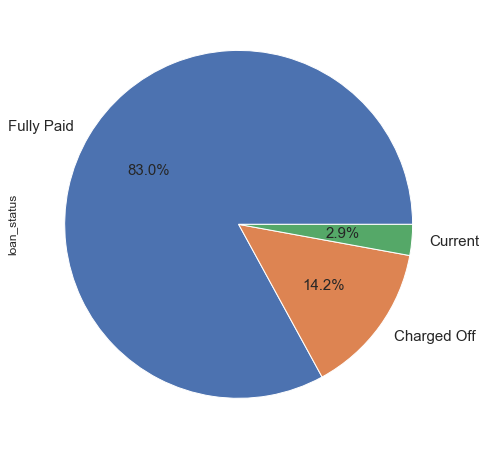

In [5]:
loan_df.loan_status.value_counts(normalize=True).plot(kind='pie', figsize=[10,8], autopct="%.1f%%",fontsize=15)

#### Null value analysis

In [6]:
dict((loan_df.isnull().sum()/len(loan_df.index)*100).sort_values(ascending=False))

{'verification_status_joint': 100.0,
 'annual_inc_joint': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_old_il_acct': 100.0,
 'bc_util': 100.0,
 'bc_open_to_buy': 100.0,
 'avg_cur_bal': 100.0,
 'acc_open_past_24mths': 100.0,
 'inq_last_12m': 100.0,
 'total_cu_tl': 100.0,
 'inq_fi': 100.0,
 'total_rev_hi_lim': 100.0,
 'all_util': 100.0,
 'max_bal_bc': 100.0,
 'open_rv_24m': 100.0,
 'open_rv_12m': 100.0,
 'il_util': 100.0,
 'total_bal_il': 100.0,
 'mths_since_rcnt_il': 100.0,
 'open_il_24m': 100.0,
 'open_il_12m': 100.0,
 'open_il_6m': 100.0,
 'open_acc_6m': 100.0,
 'tot_cur_bal': 100.0,
 'tot_coll_amt': 100.0,
 'mo_sin_rcnt_rev_tl_op': 100.0,
 'mo_sin_rcnt_tl': 100.0,
 'mort_acc': 100.0,
 'num_rev_tl_bal_gt_0': 100.0,
 'total_bc_limit': 100.0,
 'total_bal_ex_mort': 100.0,
 'tot_hi_cred_lim': 100.0,
 'percent_bc_gt_75': 100.0,
 'pct_tl_nvr_dlq': 100.0,
 'num_tl_op_past_12m': 100.0,
 'num_tl_90g_dpd_24m': 100.0,
 'num_tl_30dpd': 100.0,
 'num_tl_120dpd_2m': 100.0,
 'num_sats': 100.0,
 'n

There are many columns which doesn't contain any non-null values. Those won't contribute much knowledge for EDA.

Dropping those columns in the next cell

In [7]:
loan_df = loan_df.loc[:,loan_df.notnull().sum()!=0]
loan_df.shape

(39717, 57)

In [8]:
for col in loan_df.columns:
    if len(loan_df[col].unique())<=2:
        print('Unique values for ',col,' are: ',loan_df[col].unique())

Unique values for  term  are:  [' 36 months' ' 60 months']
Unique values for  pymnt_plan  are:  ['n']
Unique values for  initial_list_status  are:  ['f']
Unique values for  collections_12_mths_ex_med  are:  [ 0. nan]
Unique values for  policy_code  are:  [1]
Unique values for  application_type  are:  ['INDIVIDUAL']
Unique values for  acc_now_delinq  are:  [0]
Unique values for  chargeoff_within_12_mths  are:  [ 0. nan]
Unique values for  delinq_amnt  are:  [0]
Unique values for  tax_liens  are:  [ 0. nan]


There are multiple columns with single value (and missing value) which won't help us understand the data.

Dropping those columns in next cell.

In [9]:
loan_df = loan_df.drop(['tax_liens','application_type','pymnt_plan','policy_code','collections_12_mths_ex_med','delinq_amnt','chargeoff_within_12_mths','initial_list_status','acc_now_delinq',],axis=1)
loan_df.shape

(39717, 48)

Dropping columns that have textual data or minute details

In [10]:
text_cols = ['url', 'desc', 'emp_title', 'title']
loan_df = loan_df.drop(text_cols, axis=1, errors='ignore')
loan_df.shape

(39717, 44)

#### Create New Columns

In [11]:
loan_df['default'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_df['sub_grade_no'] = loan_df.sub_grade.apply(lambda x:int(x[1]))
loan_df['issue_year'] = pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_month'] = pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.month
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year

#### Clean Columns

In [12]:
loan_df['int_rate'] = loan_df.int_rate.apply(lambda x:float(x[:-1]))

Dropping redundant columns - columns with high correlation

These columns ('funded_amnt',  'funded_amnt_inv') aren't available during loan application

In [13]:
loan_df[['loan_amnt', 'funded_amnt',  'funded_amnt_inv']].corr()
redundant_cols = ['funded_amnt',  'funded_amnt_inv',]
loan_df = loan_df.drop(redundant_cols, axis=1, errors='ignore')
loan_df.shape

(39717, 47)

Dropping columns are all either customer behaviour columns, missing all values 
 or have very little information for our usecase

In [14]:
drop_cols=['issue_d', 'revol_bal', 'revol_util','out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'zip_code']

In [15]:
loan_df = loan_df.drop(drop_cols, axis=1)
loan_df.shape

(39717, 30)

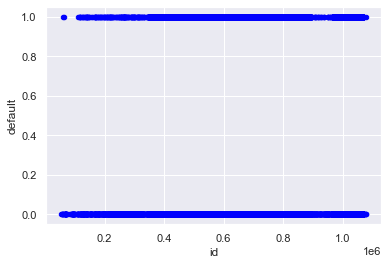

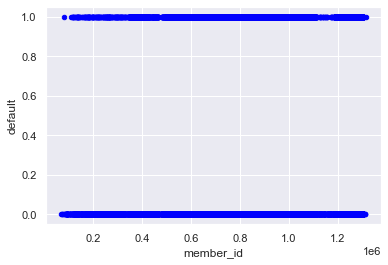

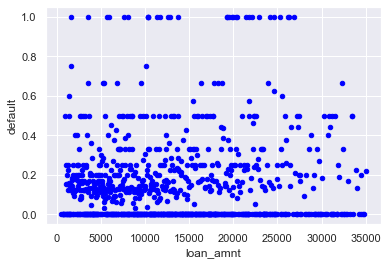

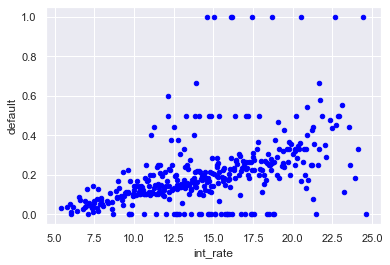

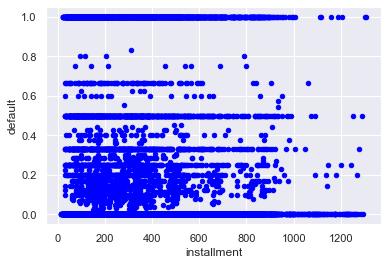

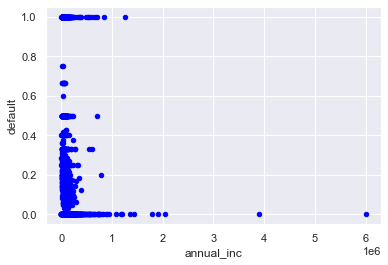

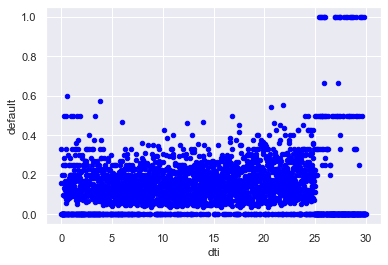

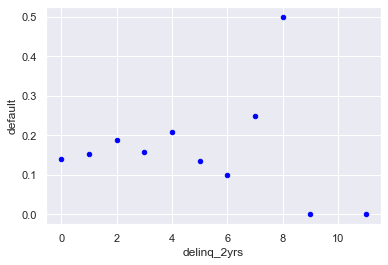

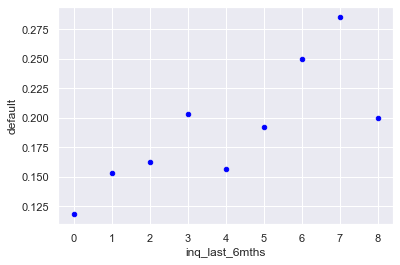

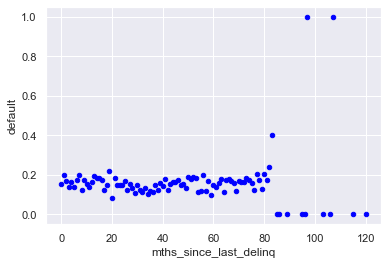

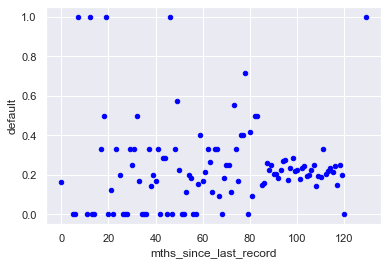

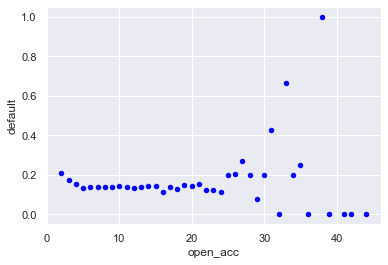

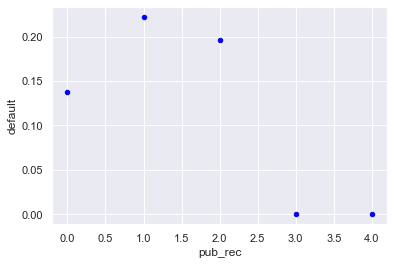

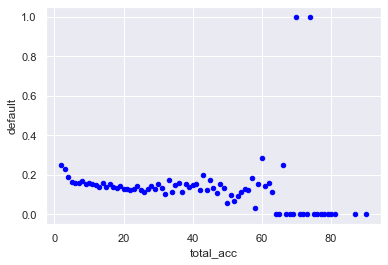

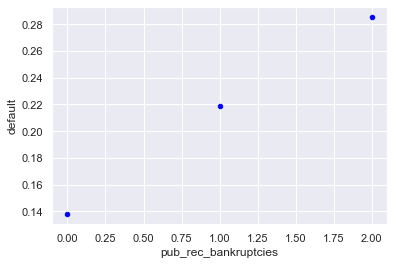

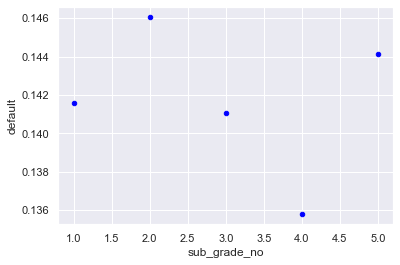

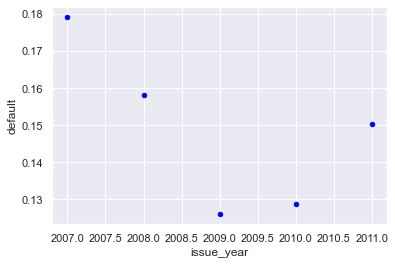

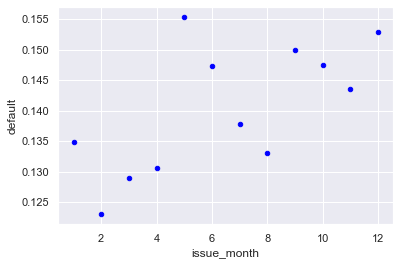

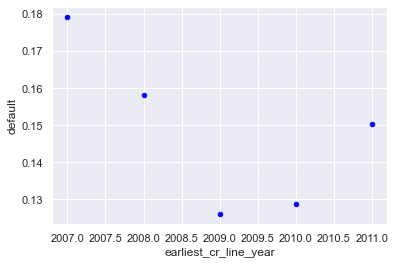

In [16]:
for col in loan_df.select_dtypes(['int64','float64']).columns:
    if col!='default':
        loan_df.groupby(col)['default'].mean().reset_index().plot.scatter(x=col,y='default',c = 'blue')

In [17]:
loan_df.dtypes

id                          int64
member_id                   int64
loan_amnt                   int64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
total_acc                   int64
pub_rec_bankruptcies      float64
default                     int64
sub_grade_no                int64
issue_year                  int64
issue_month                 int64
earliest_cr_li

In [18]:
loan_df['mths_since_last_delinq_bin']=pd.cut(loan_df.mths_since_last_delinq,10)

<AxesSubplot:xlabel='mths_since_last_delinq_bin'>

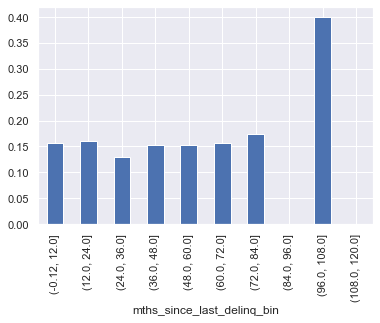

In [19]:
loan_df.groupby('mths_since_last_delinq_bin')['default'].mean().plot.bar()

In [20]:
loan_df.groupby('mths_since_last_delinq_bin')['default'].count()

mths_since_last_delinq_bin
(-0.12, 12.0]     2310
(12.0, 24.0]      2686
(24.0, 36.0]      2580
(36.0, 48.0]      2500
(48.0, 60.0]      1590
(60.0, 72.0]      1354
(72.0, 84.0]      1002
(84.0, 96.0]         6
(96.0, 108.0]        5
(108.0, 120.0]       2
Name: default, dtype: int64

Dropping columns which doesn't have much to do with default rate

In [21]:
loan_df.drop([ 'mths_since_last_record','open_acc', 'pub_rec','total_acc'], axis=1, inplace=True)

In [22]:
loan_df.shape

(39717, 27)

Dropping columns which doesn't have much to do with default rate

In [23]:
loan_df.select_dtypes(['int64','float64']).columns

Index(['id', 'member_id', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec_bankruptcies', 'default', 'sub_grade_no', 'issue_year',
       'issue_month', 'earliest_cr_line_year'],
      dtype='object')

In our analysis, we will only use **Fully Paid** and **Charged Off** loans.
As we don't know loan status of the **Current** loans. So, these rows will be dropped.

In [24]:
loan_df=loan_df[loan_df['loan_status']!='Current']
loan_df.shape

(38577, 27)

### Missing Value imputation and Outlier treatment

#### Outliers

In [25]:
numeric_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

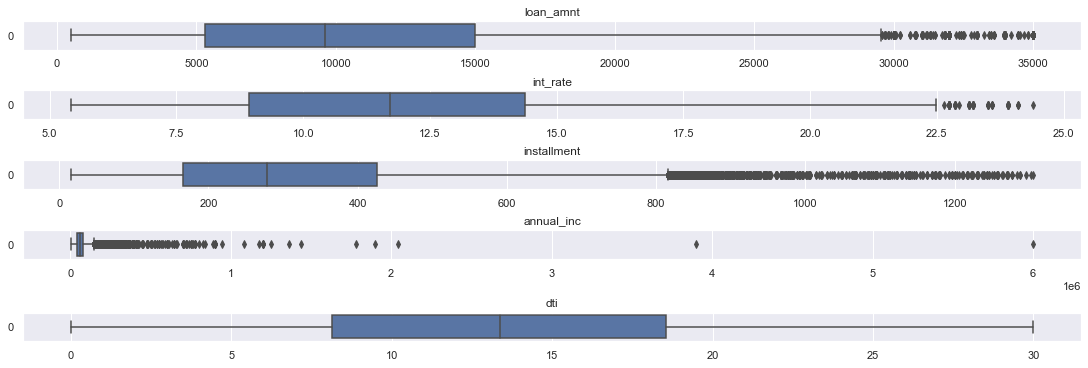

In [26]:
fig, ax = plt.subplots(5, 1, figsize=[15, 5], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.boxplot(data=loan_df[col], orient='h', ax=ax[axi])
    ax[axi].set_title(col)

Removing outliers from annual_inc

In [27]:
outlier_df = loan_df.loc[loan_df['annual_inc'] <= (np.quantile(loan_df['annual_inc'], 0.75) * 2)]
outlier_df.shape


(37384, 27)

Removing outliers from installment


In [28]:
outlier_df = outlier_df.loc[outlier_df['installment'] <= (np.quantile(outlier_df['installment'], 0.75) * 2)]
outlier_df.shape

(36394, 27)

Dropped Rows percentage

In [29]:
print(f'Dropped row percentage is {(1-outlier_df.shape[0]/loan_df.shape[0])*100}%')

Dropped row percentage is 5.65881224563859%


#### Treat Missing Values

In [30]:
outlier_df.isnull().sum() / len(outlier_df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.027697
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.646892
pub_rec_bankruptcies          0.018025
default                       0.000000
sub_grade_no                  0.000000
issue_year                    0.000000
issue_month                   0.000000
earliest_cr_line_year    

In [31]:
outlier_df['emp_length'].fillna(outlier_df['emp_length'].mode().values[0], inplace=True)
outlier_df['pub_rec_bankruptcies'].fillna(outlier_df['pub_rec_bankruptcies'].median(), inplace=True)

As this dataset is only used for EDA, Treating missing values and outliers aren't performed on the main dataset.

#### Create More New Columns After Cleaning

In [32]:
# bin numerical into categorical
# Due to outliers in annual_inc qcut is used to create bins instead of cut
loan_df['annual_inc_cat'] = pd.qcut(loan_df.annual_inc, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

loan_df['loan_amnt_cat'] = pd.cut(loan_df.loan_amnt, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
loan_df['dti_cat'] = pd.cut(loan_df.dti, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
loan_df['int_rate_cat'] = pd.cut(loan_df.int_rate, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
loan_df['installment_cat'] = pd.cut(loan_df.installment, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

#### Checking Distributions for Numeric Variables

In [33]:
loan_df[numeric_cols].describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,loan_amnt,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,5.420000,15.690000,4.000000e+03,0.000000
5%,2400.000000,6.170000,70.610000,2.400000e+04,2.100000
10%,3090.000000,7.140000,98.990000,3.000000e+04,4.060000
25%,5300.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,14.380000,425.550000,8.200000e+04,18.560000
90%,21600.000000,16.820000,620.900000,1.150000e+05,22.290000


In [34]:
target_cols = ['loan_status', 'default']
id_cols = ['id', 'member_id']
numeric_n_cols = ['annual_inc',  'dti', 'installment',  'int_rate',  'loan_amnt']
numeric_cat_cols = [f'{x}_cat' for x in numeric_n_cols]
categorical_cols = [x for x in loan_df.columns if x not in (numeric_cols + numeric_cat_cols + id_cols + target_cols)]
non_id_cols = target_cols + numeric_cols + categorical_cols

## Analysis


#### Correlation Plot
Observations:
- There is a high correlation between `loan_amnt` and `installment`
- There is a mild correlation between `loan_amnt`, `int_rate` and `annual_inc`
- There is a mild correlation between `default` and `int_rate`


<AxesSubplot:>

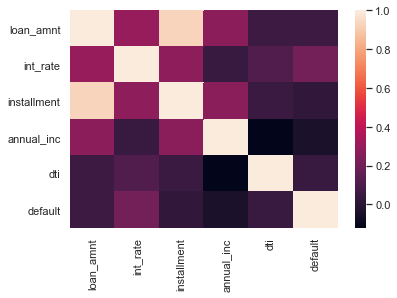

In [35]:
sns.heatmap(loan_df[numeric_cols + ['default']].corr())

#### Distributions

In [36]:
distribution_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec_bankruptcies','issue_year', 'issue_month',
       'earliest_cr_line_year']

The distributions of all numeric columns for both `Fully Paid` and `Charged Off` are similar, only different in scale.

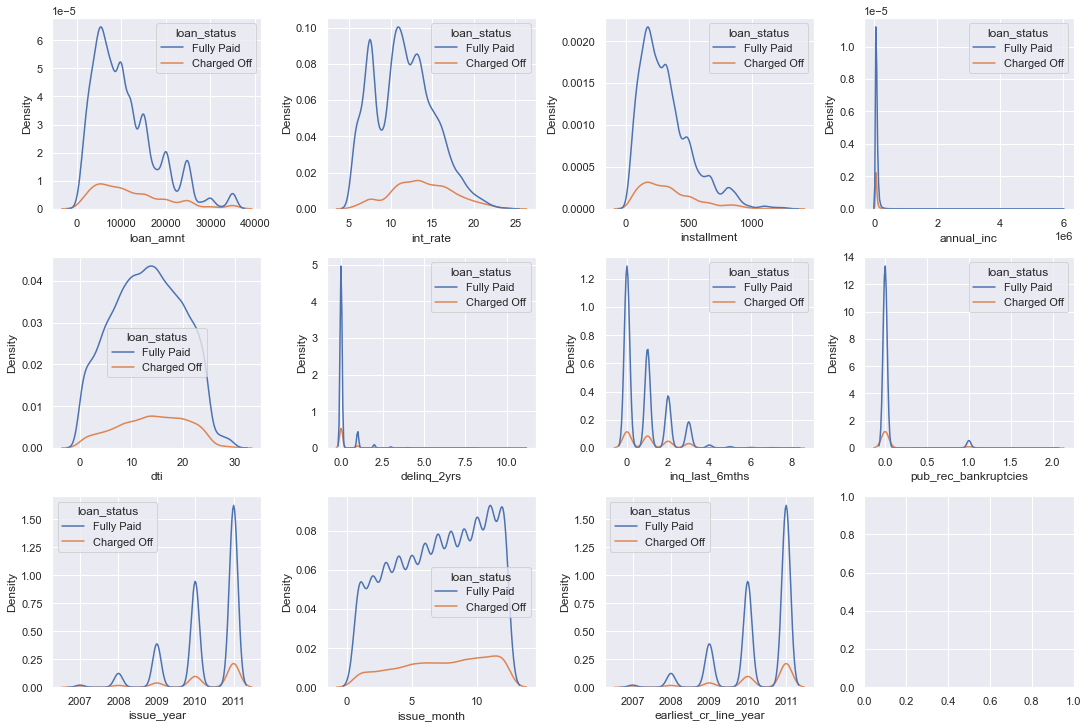

In [37]:
# distributions with outliers
fig, ax = plt.subplots(len(distribution_cols)//4+1,4, figsize=[15, 10], constrained_layout=True)
for axi, col in enumerate(distribution_cols):
    sns.kdeplot(data=loan_df, x=col, ax=ax[axi//4,axi%4], hue='loan_status')

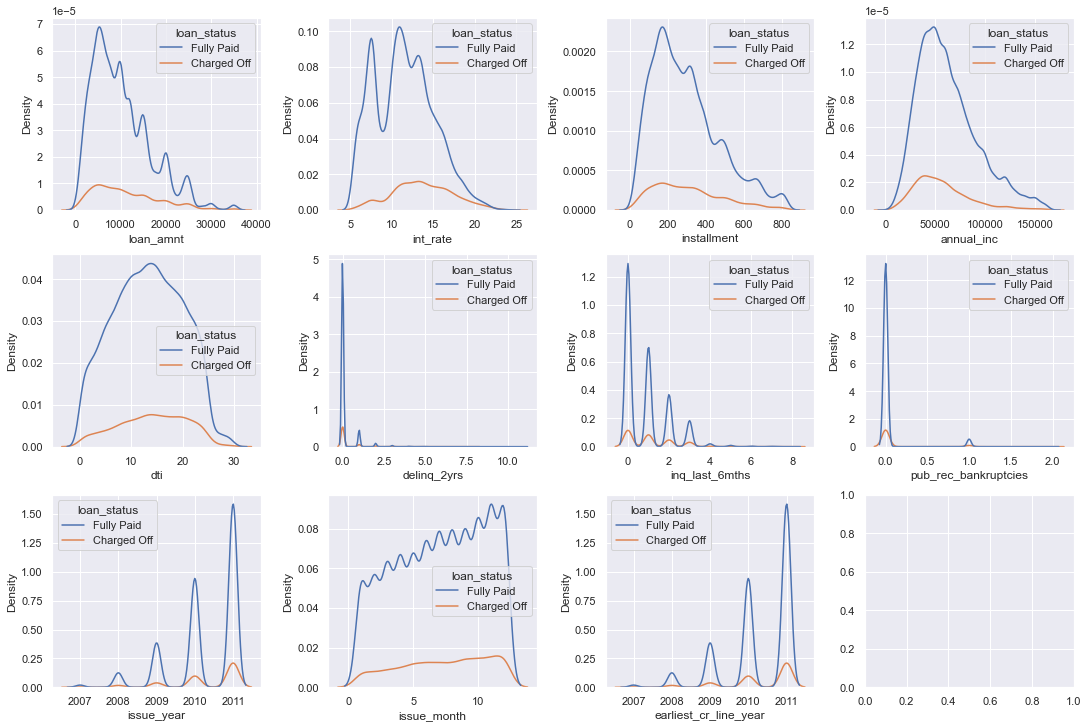

In [38]:
# distributions without outliers
fig, ax = plt.subplots(len(distribution_cols)//4+1,4, figsize=[15, 10], constrained_layout=True)
for axi, col in enumerate(distribution_cols):
    sns.kdeplot(data=outlier_df, x=col, ax=ax[axi//4,axi%4], hue='loan_status')

#### Observations
 * Term-wise we see most of the loans are of **36 months**
 * Most of the loans are for **debt_consolidation**
 * Most of the loans are taken by people who live in a **rented** accomodation or **mortaged** properties.
 * Income is **not verified** for most of the borrowers, following **verified** borrowers whose income source is not verified
 * An increasing trend can be seen both month-wise (Jan-Dec) and year-wise (2007-2011)

In [39]:
# fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
# sns.countplot(data=loan_df, x='issue_month')

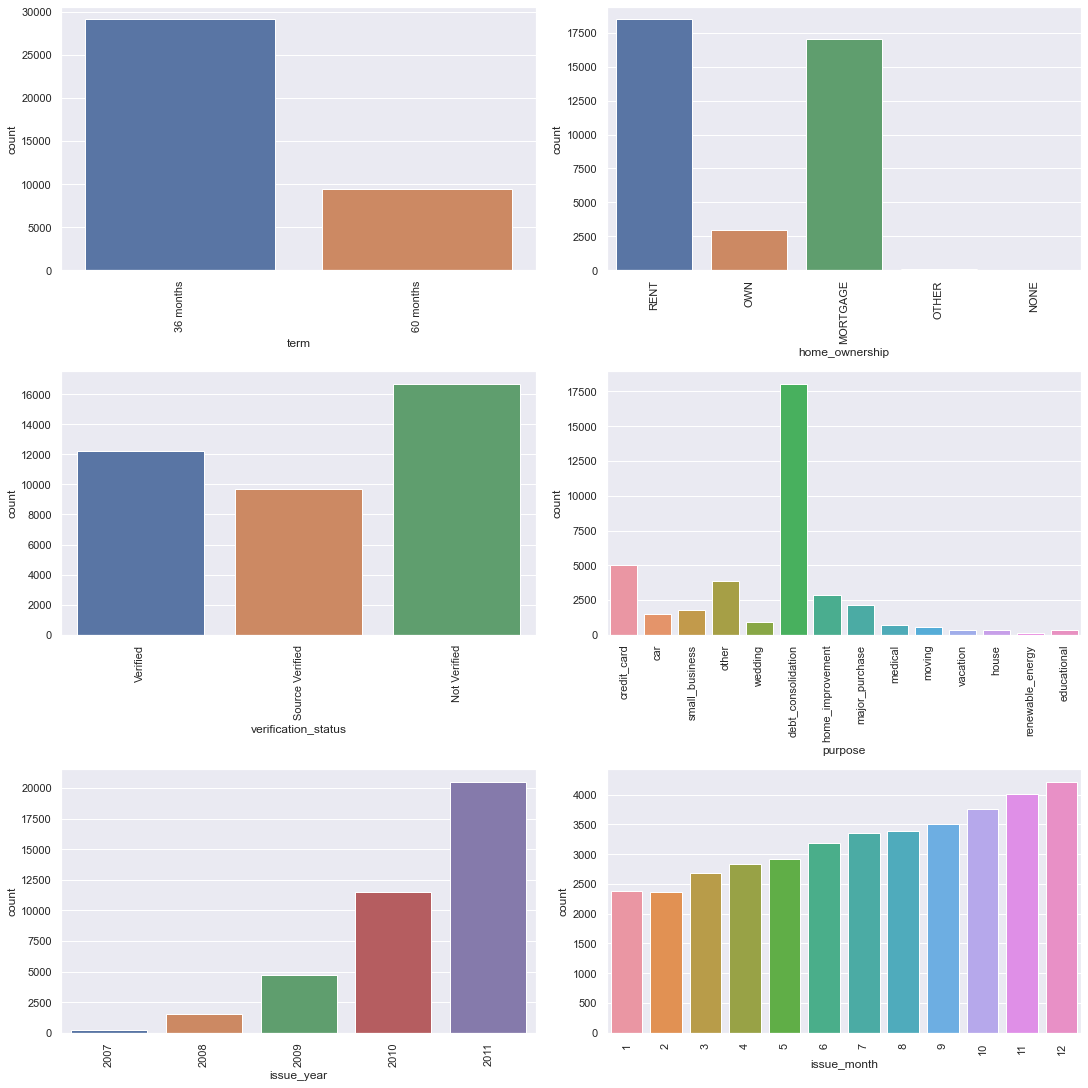

In [40]:
# plt.xticks(rotation=45)
cat_cols=['term','home_ownership', 'verification_status', 'purpose','issue_year','issue_month']
fig, ax = plt.subplots(math.ceil(len(cat_cols)/2),2, figsize=[15, 15], constrained_layout=True)
for axi, col in enumerate(cat_cols):
    plot = sns.countplot(data=loan_df, x=col, ax=ax[axi//2,axi%2] )
    plt.setp(plot.get_xticklabels(), rotation=90)


#### Observations
 - Higher the annual income, higher the default rate
 - Borrowers with annual income more than **15000** are less likely to default
 - Higher the dti (Debt-to-income ratio), higher the default rate
 - Higher the interest rate, higher the default rate
 - Higher the loan amount, higher the default rate

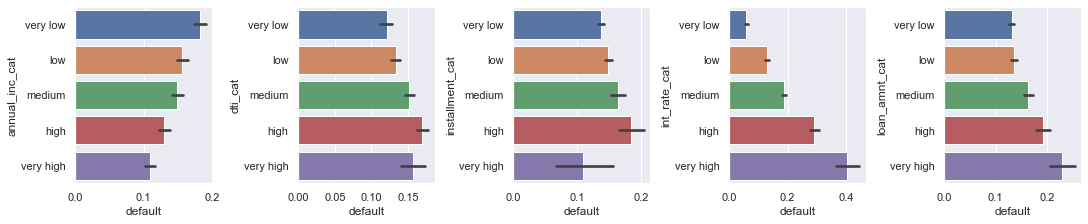

In [41]:
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cat_cols):
    sns.barplot(data=loan_df, y=col, ax=ax[axi], x='default', estimator=np.mean, orient='h')

In [42]:
loan_df['annual_inc_bin']=pd.cut(loan_df.annual_inc,[0,10_000,15_000,20_000,40_000,50_000,75_000, 1_00_000,60_00_000])

In [43]:
loan_df.groupby('annual_inc_bin')['default'].count()

annual_inc_bin
(0, 10000]              98
(10000, 15000]         397
(15000, 20000]         685
(20000, 40000]        8518
(40000, 50000]        5691
(50000, 75000]       11668
(75000, 100000]       6039
(100000, 6000000]     5481
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='annual_inc_bin'>

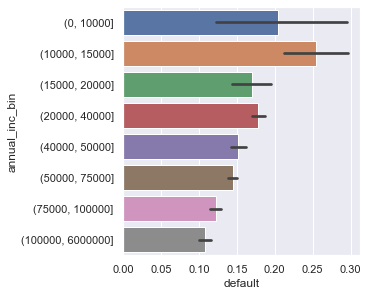

In [44]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
# loan_df.groupby('annual_inc_bin')['default'].mean().plot.bar(ylabel='default')
sns.barplot(data=loan_df, y='annual_inc_bin', x='default', estimator=np.mean, orient='h', ax=ax)

#### Observations
1. Most of the borrowers are from states with high population like (CA, NY, NJ, FL): at least 2000 loans. Their default rate is also pretty high (>=15%)
2. Nebraska have highest default rate but total no. of loans from NE is 5
3. Nevada also have high default rate

In [45]:
# sns.set(font_scale=3)
# sns.catplot(data=loan_df, y='annual_inc', x='sub_grade_no', hue='loan_status',col='grade', kind="bar",
#                     height=8, aspect=.7, )

# sns.set(font_scale=1)


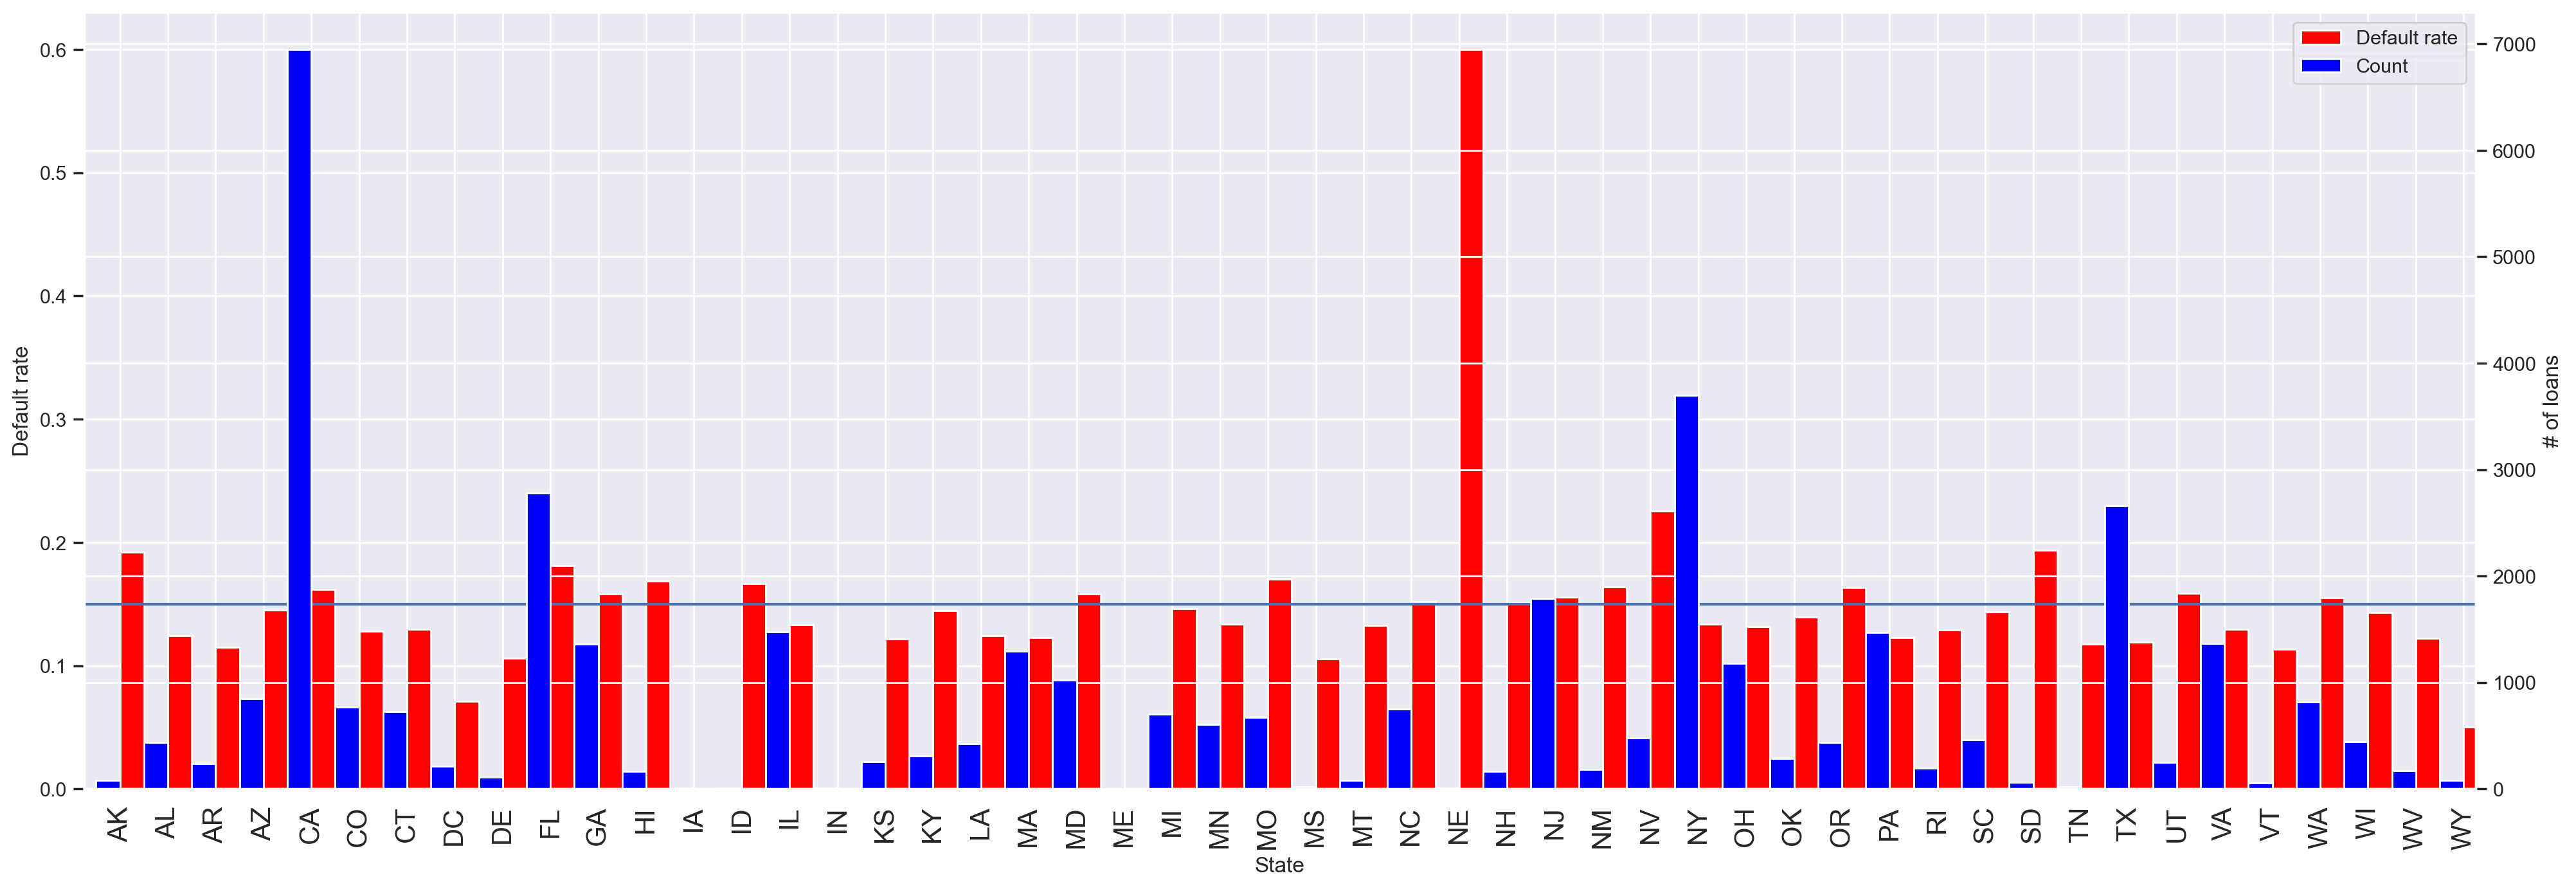

In [46]:
fig = plt.figure(figsize=(24,8),dpi=200)
state_df = loan_df.groupby('addr_state').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = state_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',legend=True)

m = state_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',legend=True)
ax.set_xlabel('State')
ax2.set_ylabel('# of loans')
ax.axhline(0.15)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

#### Observations
1. **credit_card**, **debt_consolidation**, **home_improvement**, **major_purchase** are the purposes that have more than 2000 count and at least 10% default rate
2. Median of small business loans are highest and their default rate is also highest.
3. Most of the money is invested in **debt_consolidation** and their default rate is also pretty high (above 15%).

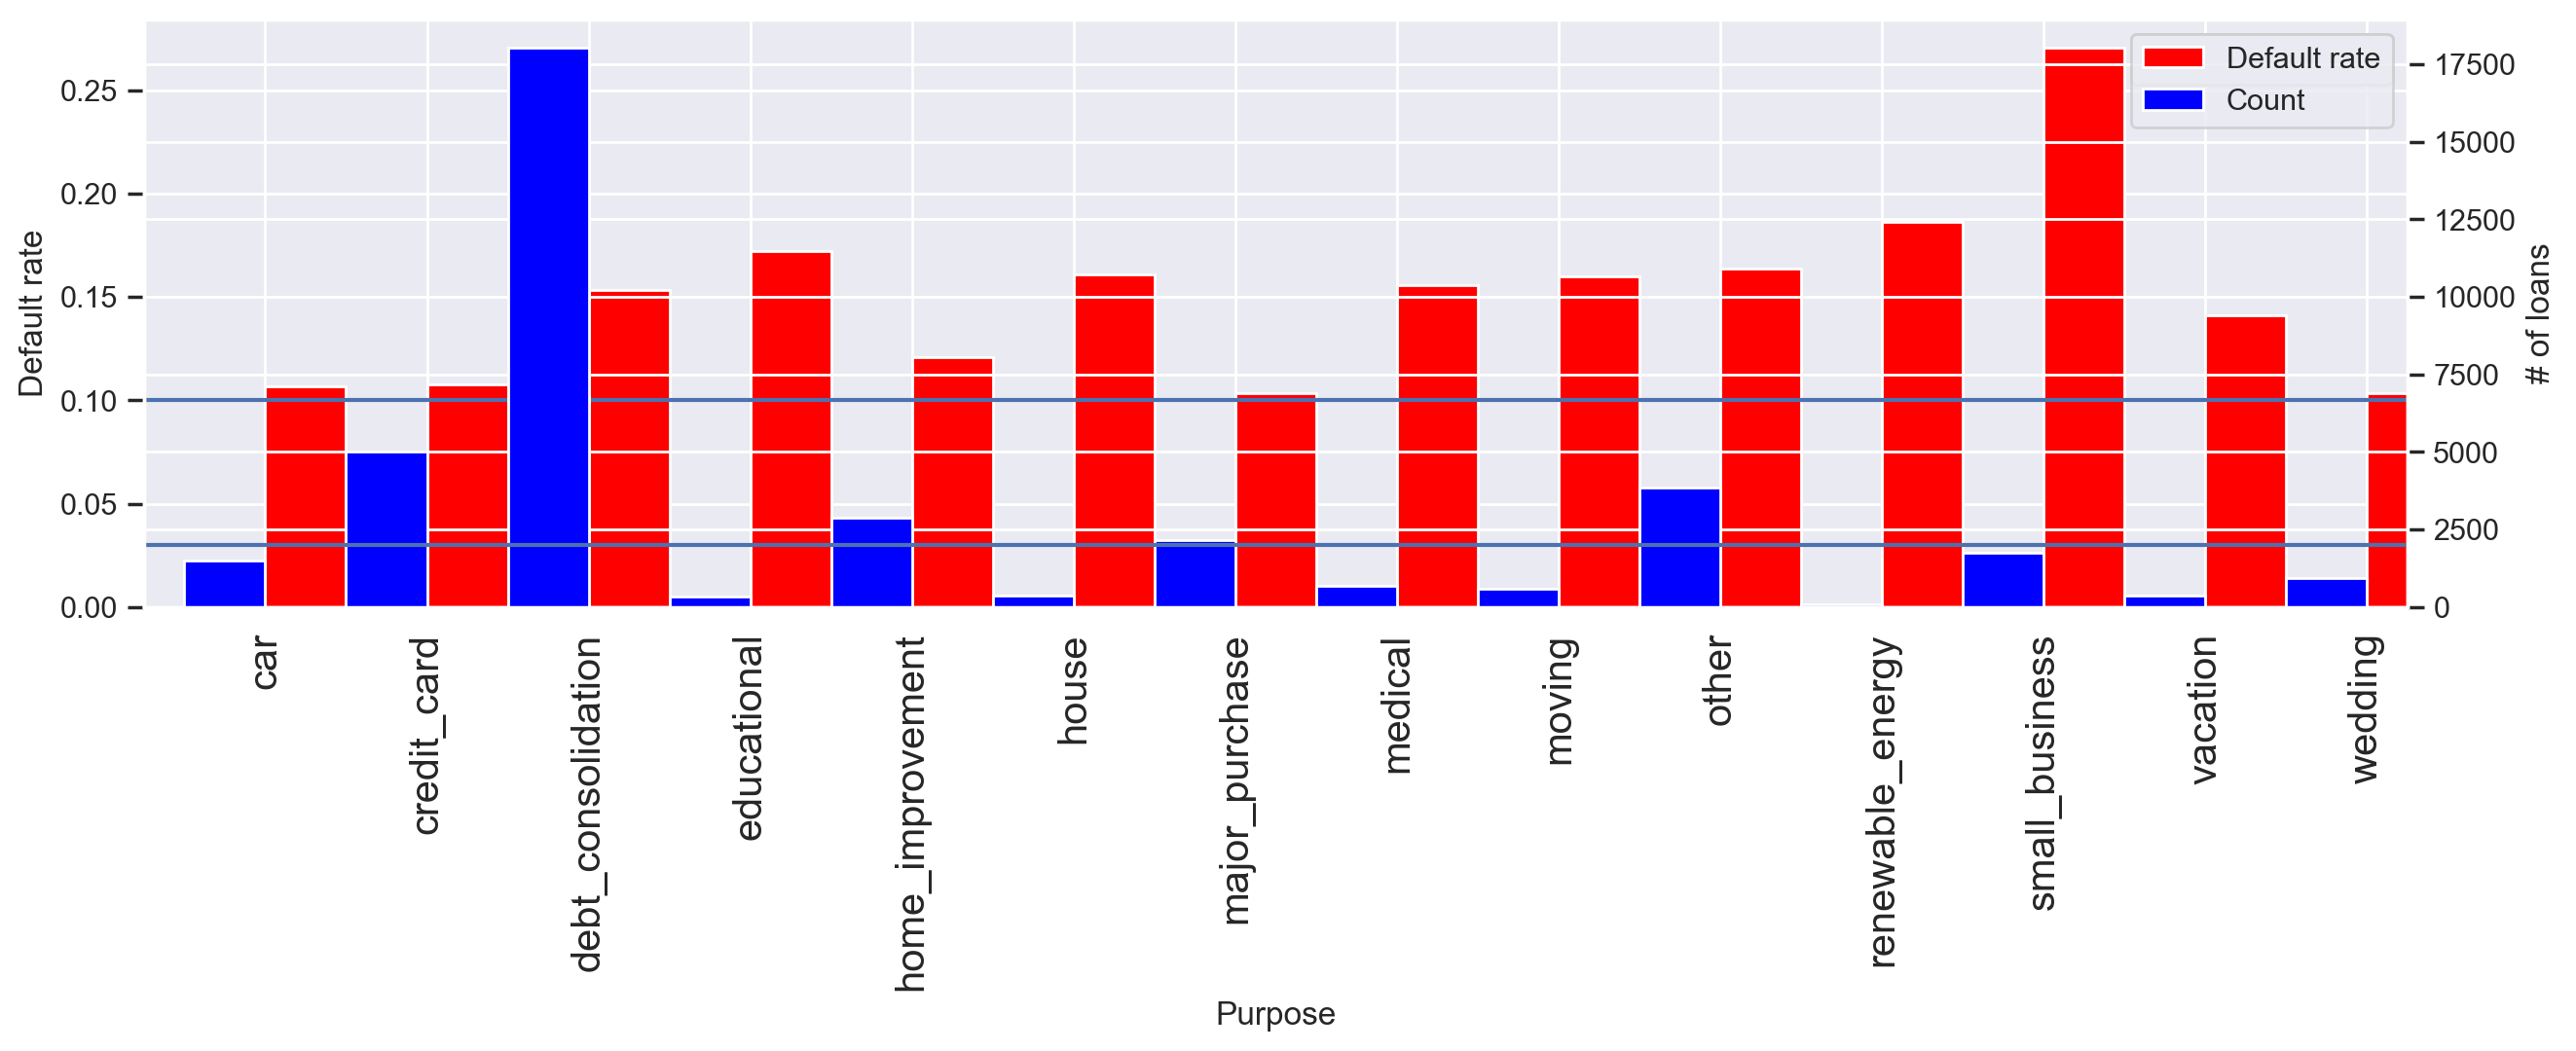

In [47]:
fig = plt.figure(figsize=(15,4),dpi=200)
purpose_df = loan_df.groupby('purpose').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = purpose_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',linewidth=1,legend=True)

m = purpose_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',linewidth=1,legend=True)
ax.set_xlabel('Purpose')
ax2.set_ylabel('# of loans')
ax.axhline(0.10)
ax2.axhline(2000)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)


Text(0.5, 0, 'Sum of loans')

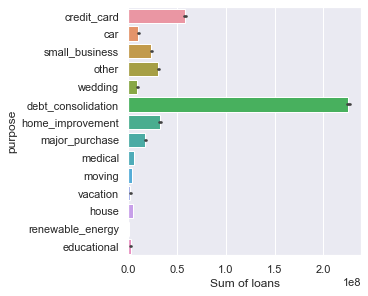

In [48]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
# loan_df.groupby('purpose')['loan_amnt'].sum().plot.barh(xlabel='Sum of loans', ax=ax)
sns.barplot(data=loan_df, y='purpose', x='loan_amnt', estimator=np.sum, orient='h', ax=ax)
ax.set_xlabel('Sum of loans')

Text(0.5, 0, 'Median of loans')

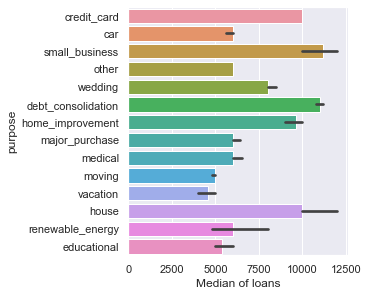

In [49]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
# loan_df.groupby('purpose')['loan_amnt'].median().plot.bar(ylabel='Median of loans')
sns.barplot(data=loan_df, y='purpose', x='loan_amnt', estimator=np.median, orient='h', ax=ax)
ax.set_xlabel('Median of loans')

<AxesSubplot:xlabel='home_ownership'>

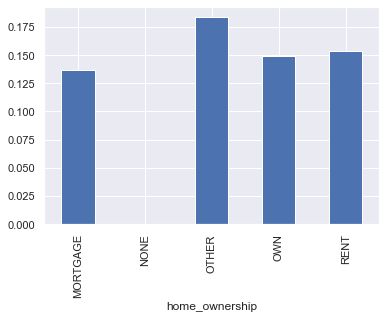

In [50]:
loan_df.groupby('home_ownership')['default'].mean().plot.bar()

#### Observations
Loans with term of 60 months are more likely(~15%) to default than loan with term of 36 months

<AxesSubplot:xlabel='term', ylabel='default'>

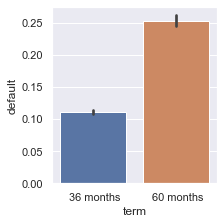

In [51]:
# loan_df.groupby('term')['default'].mean().plot.bar()
fig, ax = plt.subplots(figsize=[3, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='term', y='default')

<AxesSubplot:xlabel='verification_status', ylabel='default'>

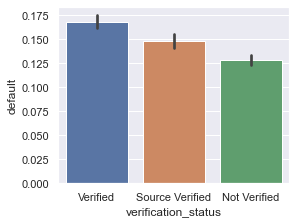

In [52]:
# loan_df.groupby('verification_status')['default'].mean().plot.bar()
fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='verification_status', y='default')

#### Observations
1. Borrowers who went bankrupt before are most likely to default. People having 2 records of bankruptcies have a higher probability to default than people with no bankruptcy report

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='default'>

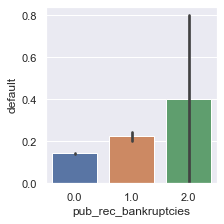

In [53]:
# loan_df.groupby('pub_rec_bankruptcies')['default'].mean().plot.bar()
fig, ax = plt.subplots(figsize=[3, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='pub_rec_bankruptcies', y='default')

<AxesSubplot:xlabel='emp_length'>

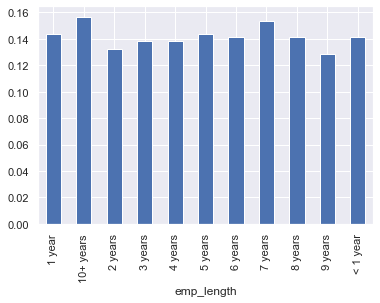

In [54]:
loan_df.groupby('emp_length')['default'].mean().plot.bar()

#### Observations
Default Rate is high for Grade >='C'. Among them F5 and G3 stands out having default rate over 40%.

Text(0, 0.5, 'default_rate')

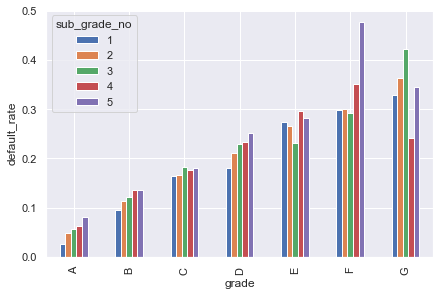

In [55]:
fig, ax = plt.subplots(figsize=[6, 4], constrained_layout=True)
pd.pivot_table(loan_df,index=['grade'],columns=['sub_grade_no'],values='default',aggfunc=np.mean).plot.bar(ax=ax)
ax.set_ylabel('default_rate')

#### Observations
- A steep increasing trend in default rate can be seen for loans with interest more than 12.5%.
- For interest rates greater than 20%, the default rate goes beyond 30%.

In [56]:
loan_df.int_rate.quantile([0,0.25,0.5,0.75,0.9,1])

0.00     5.42
0.25     8.94
0.50    11.71
0.75    14.38
0.90    16.82
1.00    24.40
Name: int_rate, dtype: float64

In [57]:
loan_df['int_rate_bin']=pd.cut(loan_df.int_rate,[0,5,7.5,10,12.5,15,17.5,20,22.5,25])

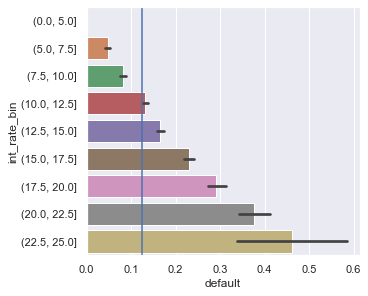

In [58]:
# ax=loan_df.groupby('int_rate_bin')['default'].mean().plot.bar()
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_df, y='int_rate_bin', x='default', orient='h')
ax.axvline(0.125)

#### Observations
Loans issued in 2009 (After 2007-2008 banking crisis) the default rate decreased probably due to safer lending.

<AxesSubplot:xlabel='issue_year', ylabel='default'>

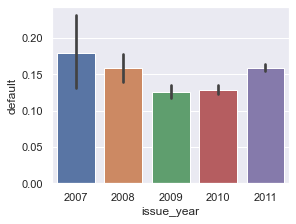

In [59]:
# ax=loan_df.groupby('issue_year')['default'].mean().plot.bar()
fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='issue_year', y='default')

#### Observations
Borrower with higher annual_inc go for higher loan amount

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

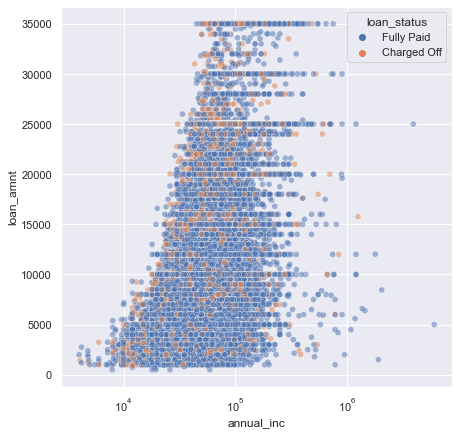

In [60]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.scatterplot(data=loan_df, hue='loan_status', x='annual_inc', y='loan_amnt', alpha=0.5, ax=ax)


# Recommendations

### Stop
- pub_rec_bankruptcy > 1
- Loans to Grade F
- int_rate > 20%

### Reduce 
- annual_inc<15000
- state in (FL,NY,NV,CA,TX)
- grade > 'C'
- int_rate > 12.5%
- term = 60 mnths

### Increase
- int_rate 7.5/10%
- Grade 'A'
- 0 pub_rec_bankruptcies
- term=36 months
- purpose=credit card
- lesser loan amount
- lower dti

